# Эксперимент был прерван. Директория с ним удалена!!

## Предсказываем внутренность дома с разными lr

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [3]:
!nvidia-smi

Sat Nov 18 22:09:39 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    58W / 149W |   3519MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import copy

import datetime

from shutil import copyfile
import os
import json

In [5]:
DESCRIPTION = """Предсказываем внутренность дома с разными lr
Experiment_2017_11_19_10
"""

DATE = str(datetime.datetime.now())

DIR = './experiments/%s' % DATE

os.mkdir(DIR)

json.dump(DESCRIPTION, open(DIR + "/description.txt", "w"))
MODULES = ['dataset', 'unet', 'train_test_loader']

for m in MODULES:
    fname = "%s.py" % m
    copyfile(fname, DIR + '/' + fname)

[s, u, train_test_loader] = map(__import__, MODULES)

In [6]:
data_set = s.DataSet("./dataset/trainset", [s.ChannelPAN], image_size=(240,240))
ids = data_set.load()

train_ids, test_ids = train_test_loader.load_train_test()

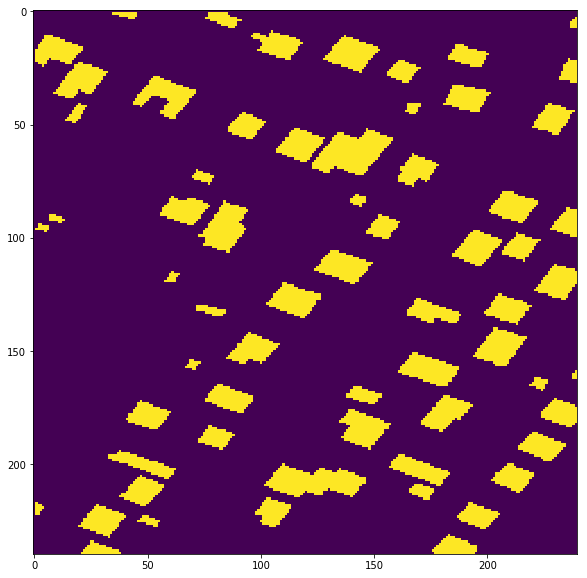

In [7]:
plt.figure(figsize=(10,10))
arr = data_set.get_mask(train_ids[3])
plt.imshow(arr)

In [8]:
net = u.UnetModel('classic-unet-border', data_set, DIR + "/model", lr=5e-4)

In [9]:
batch_generator = u.BatchGenerator(data_set, train_ids, random_rotate=True, shuffle_on_each_epoch=True)

In [19]:
t = net.optimizer.lr

In [21]:
t.assign(1e-5)

<tf.Tensor 'Assign:0' shape=() dtype=float32_ref>

In [22]:
net.train(batch_generator, epochs=60, batch_size=10)

epoch: 4, loss: 0.284040
epoch: 4, loss: 0.249631
epoch: 4, loss: 0.266195
epoch: 4, loss: 0.265184
epoch: 4, loss: 0.264480
epoch: 4, loss: 0.237363
epoch: 4, loss: 0.236655
epoch: 4, loss: 0.317028
epoch: 4, loss: 0.226733
epoch: 4, loss: 0.228147
epoch: 4, loss: 0.282492
epoch: 4, loss: 0.236244
epoch: 4, loss: 0.255142
epoch: 4, loss: 0.274786
epoch: 4, loss: 0.222816
epoch: 4, loss: 0.303476
epoch: 4, loss: 0.264193
epoch: 4, loss: 0.272672
epoch: 4, loss: 0.287527
epoch: 4, loss: 0.226501
epoch: 4, loss: 0.245306
epoch: 4, loss: 0.253579
epoch: 4, loss: 0.240162
epoch: 4, loss: 0.253436
epoch: 4, loss: 0.258092
epoch: 4, loss: 0.307327
epoch: 4, loss: 0.222136
epoch: 4, loss: 0.325121
epoch: 4, loss: 0.256999
epoch: 4, loss: 0.239748
epoch: 4, loss: 0.232707
epoch: 4, loss: 0.257492
epoch: 4, loss: 0.256182
epoch: 4, loss: 0.220201
epoch: 4, loss: 0.272970
epoch: 4, loss: 0.262437
epoch: 4, loss: 0.326235
epoch: 4, loss: 0.240283
epoch: 4, loss: 0.254018
epoch: 4, loss: 0.264507


KeyboardInterrupt: 